<a href="https://colab.research.google.com/github/tanisha0016/Parameter-Optimization-of-SVM/blob/main/Parameter_Optimization_of_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running experiments: 100%|██████████| 10/10 [00:00<00:00, 10.39it/s]



🔍 Final Results Summary:
  Sample  Best Accuracy                    Best Parameters
0     S1          97.78      {'kernel': 'rbf', 'nu': 0.19}
1     S2          97.78     {'kernel': 'poly', 'nu': 0.52}
2     S3         100.00   {'kernel': 'linear', 'nu': 0.24}
3     S4          95.56     {'kernel': 'poly', 'nu': 0.32}
4     S5          97.78   {'kernel': 'linear', 'nu': 0.61}
5     S6          97.78   {'kernel': 'linear', 'nu': 0.58}
6     S7          97.78  {'kernel': 'sigmoid', 'nu': 0.54}
7     S8          95.56    {'kernel': 'linear', 'nu': 0.1}
8     S9          95.56     {'kernel': 'poly', 'nu': 0.02}
9    S10         100.00      {'kernel': 'rbf', 'nu': 0.47}


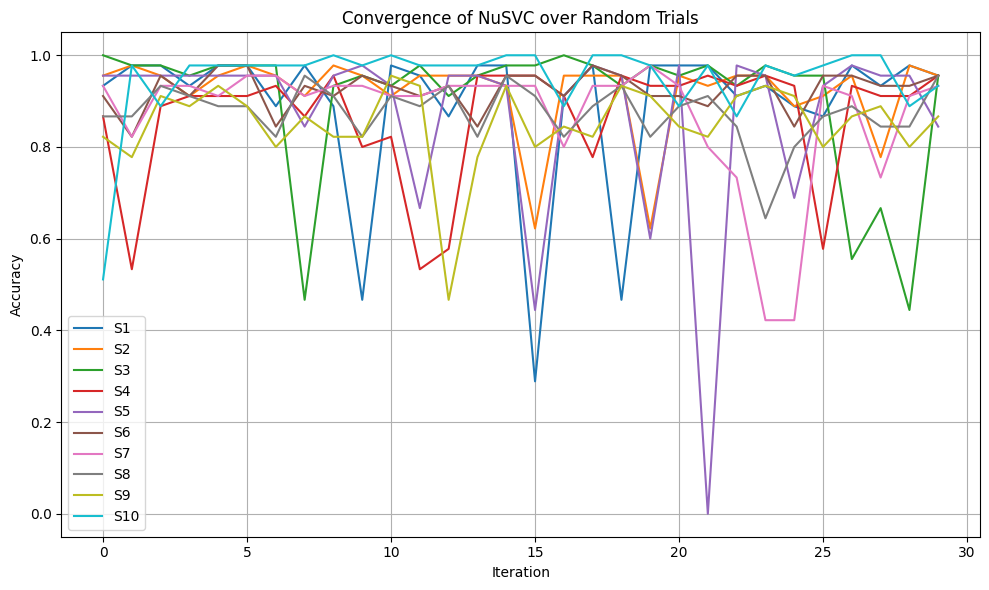

In [1]:
import random
import numpy as np
import pandas as pd
import warnings
from sklearn.svm import NuSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.exceptions import ConvergenceWarning
from tqdm import tqdm

# Load and scale data
iris = load_iris()
X = iris.data
y = iris.target
X_scaled = StandardScaler().fit_transform(X)

# Initialize results storage
results = []
convergence_data = {}

# Run 10 train-test splits and model tuning
for i in tqdm(range(10), desc="Running experiments"):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=i)

    best_acc = 0
    best_params = {}
    acc_list = []

    for iteration in range(1, 31):  # Reduced from 100 to 30 for faster runtime
        kernel = random.choice(['linear', 'rbf', 'poly', 'sigmoid'])
        nu = round(random.uniform(0.01, 0.9), 2)

        model = NuSVC(kernel=kernel, nu=nu)

        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", category=ConvergenceWarning)
                model.fit(X_train, y_train)
                preds = model.predict(X_test)
                acc = accuracy_score(y_test, preds)
        except Exception as e:
            acc = 0  # Default accuracy for failed model
        acc_list.append(acc)

        if acc > best_acc:
            best_acc = acc
            best_params = {"kernel": kernel, "nu": nu}

    results.append({
        "Sample": f"S{i+1}",
        "Best Accuracy": round(best_acc * 100, 2),
        "Best Parameters": best_params
    })

    convergence_data[f"S{i+1}"] = acc_list

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\n🔍 Final Results Summary:")
print(results_df)

# Optional: save results
results_df.to_csv("nusvc_results.csv", index=False)

# Optional: Plot convergence for all samples
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for sample, accs in convergence_data.items():
    plt.plot(accs, label=sample)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Convergence of NuSVC over Random Trials")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("nusvc_convergence.png")
plt.show()
